<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Text-manipulation" data-toc-modified-id="Text-manipulation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Text manipulation</a></span><ul class="toc-item"><li><span><a href="#Data-loading" data-toc-modified-id="Data-loading-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data loading</a></span></li><li><span><a href="#Splitting-on-theoritical-ending" data-toc-modified-id="Splitting-on-theoritical-ending-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Splitting on theoritical ending</a></span></li><li><span><a href="#From-lines-to-table" data-toc-modified-id="From-lines-to-table-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>From lines to table</a></span></li><li><span><a href="#Reconcile-columns-by-line" data-toc-modified-id="Reconcile-columns-by-line-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Reconcile columns by line</a></span><ul class="toc-item"><li><span><a href="#Reconcile-1-and-3-columns" data-toc-modified-id="Reconcile-1-and-3-columns-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Reconcile 1 and 3 columns</a></span></li><li><span><a href="#Reconcile-2-columns" data-toc-modified-id="Reconcile-2-columns-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Reconcile 2 columns</a></span></li></ul></li><li><span><a href="#Reconcile-columns-by-line" data-toc-modified-id="Reconcile-columns-by-line-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Reconcile columns by line</a></span><ul class="toc-item"><li><span><a href="#Reconcile-1-and-3-columns" data-toc-modified-id="Reconcile-1-and-3-columns-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Reconcile 1 and 3 columns</a></span></li><li><span><a href="#Reconcile-2-columns" data-toc-modified-id="Reconcile-2-columns-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Reconcile 2 columns</a></span></li></ul></li></ul></li><li><span><a href="#Export-cleaned" data-toc-modified-id="Export-cleaned-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Export cleaned</a></span><ul class="toc-item"><li><span><a href="#Cleaned-line" data-toc-modified-id="Cleaned-line-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cleaned line</a></span></li><li><span><a href="#Cleaned-block" data-toc-modified-id="Cleaned-block-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Cleaned block</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import json
from glob import glob
import numpy as np
from tqdm import tqdm_notebook as tqdm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata

def index_from_boolean(series):
    return series.where(series).dropna().index

In [2]:
ocr_files = glob('data/ocr_alto/*.json')

In [2]:
df_rep = pd.read_excel('repertoires.xlsx')
df_rep.dropna(subset=['nom_court'], inplace=True)
df_rep['ids'] = df_rep['lien_source'].str.replace('https://gallica.bnf.fr/ark:/12148/', '')
df_rep['vue_debut'] = df_rep['vue_debut'].astype(int)
df_rep['annee'] = df_rep['annee'].astype(int)
# df_rep['annee'] = pd.to_datetime(df_rep['annee'].astype(int), format='%Y')
df_rep.set_index('ids', inplace=True)
df_rep.head()

,nom_court,annee,remarques,lien_source,source_ID,vue_debut,page_debut,vue_fin,page_fin,page_total,pages,nom_fichier
ids,,,,,,,,,,,,
bpt6k63243601,Annuaire-general-du-commerce,1839,NaN,https://gallica.bnf.fr/ark:/12148/bpt6k63243601,FRBNF32698036,123,103.0,399.0,379,1457,277.0,bpt6k63243601.Alto.html
bpt6k62931221,Annuaire-general-du-commerce,1841,"document en 2 parties sur Gallica, seule la pr...",https://gallica.bnf.fr/ark:/12148/bpt6k62931221,FRBNF32698036,151,72.0,423.0,344,938,273.0,bpt6k62931221.Alto.html
bpt6k6286466w,Annuaire-general-du-commerce,1842,"document en 2 parties sur Gallica, seule la pr...",https://gallica.bnf.fr/ark:/12148/bpt6k6286466w,FRBNF32698036,189,91.0,489.0,391,939,301.0,bpt6k6286466w.Alto.html
bpt6k6393838j,Annuaire-general-du-commerce,1843,"document en 2 parties sur Gallica, seule la pr...",https://gallica.bnf.fr/ark:/12148/bpt6k6393838j,FRBNF32698036,219,107.0,482.0,378,969,264.0,bpt6k6393838j.Alto.html
bpt6k6331310g,Annuaire-general-du-commerce,1844,La dernière page comprend le début d'une autre...,https://gallica.bnf.fr/ark:/12148/bpt6k6331310g,FRBNF32698036,216,103.0,483.0,372,977,268.0,bpt6k6331310g.Alto.html


## Text manipulation

### Data loading

In [ ]:
# Gets for a given line all the words and gives them a unique index
def get_words_line(doc_id, vue_debut, idx_page, idx_block, idx_line, line, offset_words=0):
    words = []
    for idx_word, word in enumerate(line):
        row = {}
        row['document'] = doc_id
        row['page'] =  vue_debut + idx_page
        row['block'] = idx_block
        row['line'] = idx_line
        row['word'] = offset_words+idx_word
        row['text'] = word['text']
        row['full_text'] = row['text']
        row['is_hyphen'] = False
        if 'full_text' in word:
            row['full_text'] = word['full_text']
            row['is_hyphen'] = True
        words.append(row)
    return words
# Merges two or more lists into one, dropping the first element of all list except the first one
# i.e. merge([a,b,c], [c,d,e], [e,f,g]) becomes [a,b,c,d,e,f,g]
def merge_list_dropping(lists):
    res = []
    if len(lists) <= 0:
        return res
    res.extend(lists[0])
    for i in range(1, len(lists)):
        l = lists[i]
        if len(l) > 1:
            res.extend(lists[i][1:])
    return res

# Iterates over all documents' jsons and extract the data
rows = []
for idx_document, ocr_file in tqdm(enumerate(ocr_files)):
    # Get the doc id 
    doc_id = ocr_file.split('/')[-1].split('_')[0]
    # Get the number of the first vue and iterate over them
    # WARNING: does not work for some reason
    vue_debut = int(df_rep.loc[doc_id]['vue_debut'])
    with open(ocr_file, 'r', encoding='utf-8') as infile:
        data = json.load(infile)
    for idx_page, page in tqdm(enumerate(data), leave=False):
        for idx_block, block in enumerate(page):
            # Boolean logic to check if last element of each line is an hyphen
            # Creates new lines by merging hyphens
            ending = np.array([('full_text' in x[-1]) and len(x) > 1 for x in block])
            transititons = ending[1:]*2+ending[:-1]
            new_lines = np.split(block, np.where((transititons == 0) | (transititons == 2))[0]+1)
            new_lines = [merge_list_dropping(lines) for lines in new_lines]
            
            for idx_line, line in enumerate(new_lines):
                rows.extend(get_words_line(doc_id, vue_debut, idx_page, idx_block, idx_line, line))

In [8]:
# Load the row into a dataframe
df = pd.DataFrame(rows)
df = df[['text', 'full_text', 'is_hyphen', 'document', 'page', 'block', 'line', 'word']]
df.set_index(['document', 'page', 'block', 'line', 'word'], inplace=True)
df_lines = df.groupby(level=[0,1,2,3])['full_text'].apply(lambda x: ' '.join(x))
df_lines.to_pickle('df_lines.pickle')
df.head()

text full_text  is_hyphen
document      page block line word                             
bpt6k97630871 11   0     0    0     Gerboz    Gerboz      False
                              1       (F.)      (F.)      False
                              2      fils,     fils,      False
                              3       sacs      sacs      False
                              4         en        en      False

In [4]:
df_lines = pd.read_pickle('df_lines.pickle')

### Splitting on theoritical ending

We split the lines if they contain a number followed by a dot or a 'bis' followed by a dot: 4. or 4bis.
This a simple heuristic to give more lines, however, this does not determine the final heuristic for choosing if a number is a valid one.

In [7]:
# Split the lines
df_lines_with_split = df_lines.str.extractall(r'((?:.*?\d\.)|(?:.*?bis\.)|(?:.*))')\
                            .dropna().reset_index(level=4, drop=True)[0]

# Make the index unique by adding a new split index
df_lines_with_split = df_lines_with_split.to_frame()
df_lines_with_split.set_index(df_lines_with_split.groupby(level=[0,1,2,3]).cumcount(),  append=True, inplace=True)
df_lines_with_split.index.set_names('split', level=4, inplace=True)
df_lines_with_split = df_lines_with_split[0]

# Remove all lines that contains only not alphanumeric characters
df_lines_with_split = df_lines_with_split[~df_lines_with_split.str.contains(r'^[^\w]+$')]

# Strip the lines and remove empty comma-separated values
# e.g. ", ,fs , sad" becomes "fs, sad"
df_lines_with_split = df_lines_with_split.str.strip()
df_lines_with_split = df_lines_with_split.str.replace(r'^,(\s*,)*', '')
df_lines_with_split = df_lines_with_split.str.strip()
df_lines_with_split = df_lines_with_split.str.replace(r',(\s+,)+', ',')
df_lines_with_split = df_lines_with_split.str.strip()

df_lines_with_split.to_pickle('df_lines_with_split.pickle')

In [5]:
df_lines_with_split = pd.read_pickle('df_lines_with_split.pickle')

### From lines to table

We simply split on commas, strip all the lines and make empty lines nan

In [8]:
df_splitted = df_lines_with_split.str.split(',', expand=True)

df_splitted = df_splitted.apply(lambda col: col.str.strip())
df_splitted.replace('', np.nan, inplace=True)
df_splitted.fillna(value=pd.np.nan, inplace=True)
df_splitted.to_pickle('df_splitted.pickle')

In [4]:
df_splitted = pd.read_pickle('df_splitted.pickle')

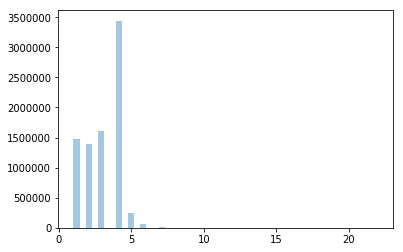

In [9]:
not_null_counts = df_splitted.notnull().sum(axis=1)
sns.distplot(not_null_counts, kde=False)

By looking at the number of non-null column, we can see that the majority of the data has the right number of fields, i.e. four: name, job, street, number.

Then the biggest others are 1, 2 and 3 columns. We could try to reconcile the 1 and 3 columns and the 2 columns amongst themselves.

The theoritical amount of person that could be extracted is computed in the following cell.

In [10]:
num_one = (not_null_counts == 1).sum()
num_two = (not_null_counts == 2).sum()
num_three = (not_null_counts == 3).sum()
num_four = (not_null_counts == 4).sum()
print("We could get at most %d entities"%(num_four + min(num_three, num_one) + num_two // 2))

We could get at most 5616400 entities


### Reconcile columns by line

#### Reconcile 1 and 3 columns

The idea to reconcile rows that contain 1 and 3 columns is quite simple:

If the rows that contains 1 column has a value that is a number, i.e. contains one or more numbers, "-", spaces, "et" and "bis", and is preceded by a row that has 3 columns, then we can merge the two.

In [11]:
num_regex = r'^(\d|-|et| )*(\d|bis)(\.)?$'

In [106]:
# Get the rows with 1 column and a number preceded by a 3 column row
df_selection = df_splitted[(df_splitted.groupby(level=[0,1])[0].shift(-1).str.contains(num_regex).fillna(False) & (not_null_counts==3))|
            (df_splitted[0].str.contains(num_regex) & (not_null_counts==1))]

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


In [107]:
selection_not_null = df_selection.notnull().sum(axis=1)

Boolean masks to select the rows with 3 columns and 1 column corresponding to the previously described logic.

In [108]:
# selects every row that has 3 elements and next row has 1 element
select_three = (selection_not_null.groupby(level=[0,1, 2]).shift(0)*100 + selection_not_null.groupby(level=[0,1, 2]).shift(-1).fillna(0)) == 301
# selects every row that has 1 element and prev row has 3 elements
select_one = (selection_not_null.groupby(level=[0,1, 2]).shift(1).fillna(0)*100 + selection_not_null.groupby(level=[0,1, 2]).shift(0)) == 301
# combination of the two
select_rows = select_three | select_one
select_rows.sum()

2002

We merge the 3 colums and 1 column rows together.

In [15]:
df_selection.loc[index_from_boolean(select_three), 3] = df_selection[select_one][0].values

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


TODO: Check if the right way to do it...

We directly modify the splitted dataframe to incldue the values of the modified rows and drop the 1 column rows.

In [16]:
df_splitted.loc[index_from_boolean(select_three)] = df_selection[select_three].values
df_splitted.drop(index_from_boolean(select_one), inplace=True)

#### Reconcile 2 columns

In [92]:
# Simple change from previous versions, does not matter...
df_left = df_splitted

In [93]:
not_null_counts_left = df_left.notnull().sum(axis=1)

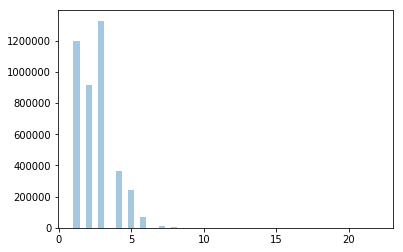

In [94]:
sns.distplot(not_null_counts_left, kde=False)

We use the same logic than before, but this time with 2 columns rows

In [95]:
num_regex = r'^(\d|-|et| )*(\d|bis)(\.)?$'

In [96]:
df_selection = df_left[not_null_counts_left == 2][(df_left[not_null_counts_left == 2].groupby(level=[0,1, 2])[1].shift(-1).str.contains(num_regex).fillna(False))|
            (df_left[not_null_counts_left == 2][1].str.contains(num_regex))]

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


This time we work on the fact that a row is a number or not, we only want to merge to row if the second one is a number and the first one not.

In [97]:
is_number = df_left[not_null_counts_left == 2][1].str.contains(num_regex).fillna(False).astype(int)

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [98]:
# selects every row that has 3 elements and next row has 1 element
select_other = (is_number.groupby(level=[0,1, 2]).shift(0)*100 + is_number.groupby(level=[0,1, 2]).shift(-1).fillna(0)) == 1
# selects every row that has 1 element and prev row has 3 elements
select_num = (is_number.groupby(level=[0,1, 2]).shift(1).fillna(4) + is_number.groupby(level=[0,1, 2]).shift(0)*100) == 100
# combination of the two
select_rows = select_other | select_num
select_rows.sum()

480

We merge the values if they matched the previously described logic and store the result in the df_splitted

In [26]:
df_selection.loc[select_other, 2:3] = df_selection.loc[select_num, 0:1].values

In [27]:
df_splitted.loc[select_other.where(select_other).dropna().index] = df_selection[select_other].values
df_splitted.drop(select_num.where(select_num).dropna().index, inplace=True)

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### Reconcile columns by line

Since we reconciled as much as possible by simple heuristic by lines, this time we try to reconcile by blocks rather than by lines.

**WARNING** **WARNING**: The <a href="#Cleaned-line">Cleaned line</a> section should be run before this section in order not to treat twice the same lines.

In [41]:
# Get the lines which have not already been treated
df_lines_with_split_selection = df_lines_with_split.loc[df_lines_with_split.index.intersection(df_splitted.index).difference(df_clean.index)]

# Group the lines by block
df_block = df_lines_with_split_selection.groupby(level=[0,1,2]).apply(lambda x: ' '.join(x))

In [42]:
# Split the block in order to have a table
df_block_splitted = df_block.str.split(',', expand=True)
df_block_splitted = df_block_splitted.apply(lambda col: col.str.strip())
df_block_splitted.replace('', np.nan, inplace=True)
df_block_splitted.fillna(value=pd.np.nan, inplace=True)
df_block_splitted.head()

0   \
document      page block                                                
bpt6k6282019m 72   4                                           Bertin   
                   9                                   Bertin-Burrier   
                   10     Bertin de Chalup 4 i ancien chef d'escadron   
                   11                             Bertin de Vaux (E.)   
                   12                                  des Beaux-Arts   

                                                             1   \
document      page block                                          
bpt6k6282019m 72   4                           tourneur en bois   
                   9      fab. de ouates et teinturier en grand   
                   10                              ViMe-FEveque   
                   11                                O. peintre   
                   12                                 Sts-Pères   

                                           2           3          4    5   \
document      page block                                                    
bpt6k6282019m 72   4                Bonaparte          80  etMélière   1.   
                   9      Vignes Saint-Marcel  10 et. 12.        NaN  NaN   
                   10                 27 bis.         NaN        NaN  NaN   
                   11                inspect.         NaN        NaN  NaN   
                   12                      7.         NaN        NaN  NaN   

                           6    7    8    9  ...    59   60   61   62   63  \
document      page block                     ...                             
bpt6k6282019m 72   4      NaN  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN  NaN   
                   9      NaN  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN  NaN   
                   10     NaN  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN  NaN   
                   11     NaN  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN  NaN   
                   12     NaN  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN  NaN   

                           64   65   66   67   68  
document      page block                           
bpt6k6282019m 72   4      NaN  NaN  NaN  NaN  NaN  
                   9      NaN  NaN  NaN  NaN  NaN  
                   10     NaN  NaN  NaN  NaN  NaN  
                   11     NaN  NaN  NaN  NaN  NaN  
                   12     NaN  NaN  NaN  NaN  NaN  

[5 rows x 69 columns]

In [43]:
not_null_counts = df_block_splitted.notnull().sum(axis=1)

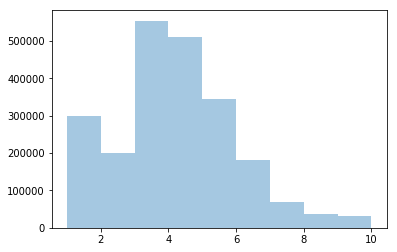

In [44]:
sns.distplot(not_null_counts, kde=False, bins=np.arange(1,11, 1))

#### Reconcile 1 and 3 columns

We use the exact same logic than with lines, but this time at the block level, so no description is provided

In [45]:
num_regex = r'^(\d|-|et| )*(\d|bis)(\.)?$'

In [46]:
df_selection = df_block_splitted[(df_block_splitted.groupby(level=[0,1])[0].shift(-1).str.contains(num_regex).fillna(False) & (not_null_counts==3))|
            (df_block_splitted[0].str.contains(num_regex) & (not_null_counts==1))]

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [47]:
len(df_selection)

48683

In [48]:
selection_not_null = df_selection.notnull().sum(axis=1)

In [49]:
# selects every row that has 3 elements and next row has 1 element
select_three = (selection_not_null.groupby(level=[0,1]).shift(0)*100 + selection_not_null.groupby(level=[0,1]).shift(-1).fillna(0)) == 301
# selects every row that has 1 element and prev row has 3 elements
select_one = (selection_not_null.groupby(level=[0,1]).shift(1).fillna(0)*100 + selection_not_null.groupby(level=[0,1]).shift(0)) == 301
# combination of the two
select_rows = select_three | select_one
select_rows.sum()

28886

In [50]:
filt = df_selection[select_rows].groupby(level=[0,1]).count()[0].apply(lambda x: x%2 != 0)
filt.sum()

0

In [51]:
df_selection.loc[select_three, 3] = df_selection[select_one][0].values

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [52]:
df_block_splitted.loc[select_three.where(select_three).dropna().index] = df_selection[select_three].values
df_block_splitted.drop(select_one.where(select_one).dropna().index, inplace=True)

#### Reconcile 2 columns

We use the exact same logic than with lines, but this time at the block level, so no description is provided

In [79]:
df_left = df_block_splitted

In [80]:
not_null_counts_left = df_left.notnull().sum(axis=1)

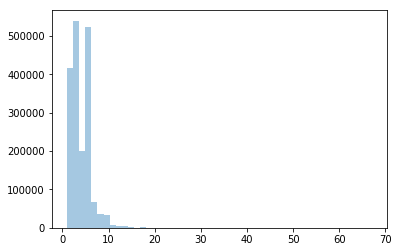

In [81]:
sns.distplot(not_null_counts_left, kde=False)

In [82]:
num_regex = r'^(\d|-|et| )*(\d|bis)(\.)?$'

In [83]:
df_selection = df_left[not_null_counts_left == 2][(df_left[not_null_counts_left == 2].groupby(level=[0,1])[1].shift(-1).str.contains(num_regex).fillna(False))|
            (df_left[not_null_counts_left == 2][1].str.contains(num_regex))]

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [84]:
len(df_selection)

56355

In [85]:
is_number = df_left[not_null_counts_left == 2][1].str.contains(num_regex).fillna(False).astype(int)

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [86]:
# selects every row that has 3 elements and next row has 1 element
select_other = (is_number.groupby(level=[0,1]).shift(0)*100 + is_number.groupby(level=[0,1]).shift(-1).fillna(0)) == 1
# selects every row that has 1 element and prev row has 3 elements
select_num = (is_number.groupby(level=[0,1]).shift(1).fillna(4) + is_number.groupby(level=[0,1]).shift(0)*100) == 100
# combination of the two
select_rows = select_other | select_num
select_rows.sum()

12992

In [87]:
df_selection.loc[select_other, 2:3] = df_selection.loc[select_num, :1].values

In [88]:
df_block_splitted.loc[select_other.where(select_other).dropna().index] = df_selection[select_other].values
df_block_splitted.drop(select_num.where(select_num).dropna().index, inplace=True)

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


## Export cleaned

In [139]:
num_regex = r'([0-9]+|bis)'
name_regex = r'\w{3}'
work_regex = r'\w{2}'

### Cleaned line

In [123]:
not_null_counts = df_splitted.notnull().sum(axis=1)

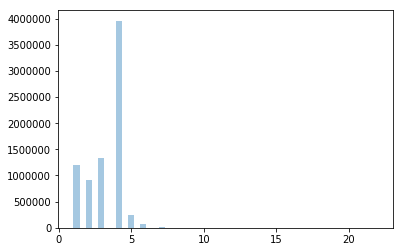

In [124]:
sns.distplot(not_null_counts, kde=False)

In [125]:
df_length_four = df_splitted[not_null_counts == 4]
len(df_length_four)

3959063

In order to validate a row, we create three arbitrarty filters that **should be tuned**.

For the number, simply that the column contains numbers or bis.

For the names, that it starts with an uppercase letter and has at least a three letters word.

For the works, that it starts with a letter and has at least a 2 letter word.

Nothing for the street.

These are simple heuristic, but they should be fine_tuned.

In [140]:
number_filter = df_length_four[3].dropna().str.strip().str.rstrip('.').str.contains(num_regex)

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [141]:
# A name must be at least 3 letters
name_filter = df_length_four[0].dropna().map(lambda x: unicodedata.normalize("NFKD", x)).str.strip().str.contains(name_regex)

In [142]:
# At least 2 letter work
work_filter = df_length_four[1].dropna().map(lambda x: unicodedata.normalize("NFKD", x)).str.strip().str.contains(work_regex).fillna(False)

In [143]:
number_filter.sum(), name_filter.sum(), work_filter.sum(), (name_filter & number_filter & work_filter).sum()

(3787550, 3928405, 3928510, 3745320)

We create a new dataframe from the filters.

In [144]:
df_clean = df_length_four[(name_filter & number_filter & work_filter)]
df_clean.to_pickle('df_clean.pickle')

In [658]:
df_clean = pd.read_pickle('df_clean.pickle')

In [145]:
len(df_clean)

3745320

We add the date of the almanach as metadata and export the dataframe to a csv.

In [634]:
df_clean.iloc[:, 0:4]
    .rename(columns={0: 'Nom', 1: 'Métier', 2: 'Rue', 3: 'Numéro'})
    .reset_index(level=[1,2,3,4], drop=True)
    .join(df_rep[['annee']])
    .to_csv('strict_adressing.csv')

### Cleaned block

Same than previous section, but for blocks.

In [146]:
not_null_counts = df_block_splitted.notnull().sum(axis=1)

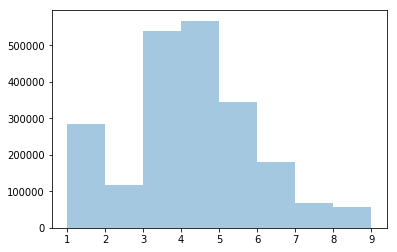

In [147]:
sns.distplot(not_null_counts, kde=False, bins=np.arange(1,10,1))

In [148]:
df_length_four = df_block_splitted[not_null_counts == 4]
len(df_length_four)

567156

In [149]:
number_filter = df_length_four[3].dropna().str.strip().str.rstrip('.').str.contains(num_regex)

/home/rbarman/.conda/envs/dh_segment/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [150]:
# A name must be at least 3 letters
name_filter = df_length_four[0].dropna().map(lambda x: unicodedata.normalize("NFKD", x)).str.strip().str.contains(name_regex)

In [151]:
# At least 2 letter work
work_filter = df_length_four[1].dropna().map(lambda x: unicodedata.normalize("NFKD", x)).str.strip().str.contains(work_regex).fillna(False)

In [153]:
number_filter.sum(), name_filter.sum(), work_filter.sum(), (name_filter & number_filter & work_filter).sum()

(478803, 559247, 554515)

In [116]:
number_filter.sum(), name_filter.sum(), work_filter.sum(), (name_filter & number_filter & work_filter).sum()

(478803, 477025, 521267, 365816)

In [154]:
df_clean_block = df_length_four[(name_filter & number_filter & work_filter)]
df_clean_block.to_pickle('df_clean_block.pickle')

In [658]:
df_clean_block = pd.read_pickle('df_clean_block.pickle')

In [155]:
len(df_clean_block), len(df_clean_block)+len(df_clean)

(465676, 4210996)

We merge the line and block level and export it.

In [156]:
pd.concat([df_clean_block.iloc[:, 0:4].rename(columns={0: 'Nom', 1: 'Métier', 2: 'Rue', 3: 'Numéro'})
           .reset_index(level=[1,2], drop=True),
           df_clean.iloc[:, 0:4].rename(columns={0: 'Nom', 1: 'Métier', 2: 'Rue', 3: 'Numéro'})
           .reset_index(level=[1,2,3,4], drop=True)]).join(df_rep[['annee']]).to_csv('strict_adressing.csv')

In [64]:
df_rep.reset_index().groupby('nom_court').nth((df_rep.reset_index().groupby('nom_court').count()['ids'].values//2).tolist())

,annee,ids,lien_source,nom_fichier,page_debut,page_fin,page_total,pages,remarques,source_ID,vue_debut,vue_fin
nom_court,,,,,,,,,,,,
Annuaire du commerce Didot-Bottin,1921,bpt6k97774838,https://gallica.bnf.fr/ark:/12148/bpt6k97774838,bpt6k97774838.Alto.html,289.0,1152quaterdecies,1484,888.0,Tome 1,FRBNF32697422,327,1214.0
Annuaire-Didot-Bottin,1858,bpt6k6318531z,https://gallica.bnf.fr/ark:/12148/bpt6k6318531z,bpt6k6318531z.Alto.html,65.0,448,1218,388.0,"document en 2 parties sur Gallica, seule la pr...",FRBNF32695639,108,495.0
Annuaire-Didot-Bottin,1870,bpt6k96727875,https://gallica.bnf.fr/ark:/12148/bpt6k96727875,bpt6k96727875.Alto.html,97.0,587,942,491.0,ATTENTION super mauvaise qualité du document! ...,FRBNF32695639,135,625.0
Annuaire-Didot-Bottin,1881,bpt6k9764647w,https://gallica.bnf.fr/ark:/12148/bpt6k9764647w,bpt6k9764647w.Alto.html,113.0,674 A 700,2370,562.0,NaN,FRBNF32695639,121,682.0
Annuaire-general-du-commerce,1841,bpt6k62931221,https://gallica.bnf.fr/ark:/12148/bpt6k62931221,bpt6k62931221.Alto.html,72.0,344,938,273.0,"document en 2 parties sur Gallica, seule la pr...",FRBNF32698036,151,423.0
Annuaire-general-du-commerce,1848,bpt6k6315927h,https://gallica.bnf.fr/ark:/12148/bpt6k6315927h,bpt6k6315927h.Alto.html,1.0,326,1049,326.0,La dernière page comprend le début d'une autre...,FRBNF32698036,349,674.0


In [131]:
np.random.seed(99)
for doc_id in [
 'bpt6k9776121t',
 'bpt6k6314752k',
 'bpt6k6305463c',
 'bpt6k63243601',
 'bpt6k9764647w',
 'bpt6k6315927h',
 'bpt6k97774838'
]:
    idxs = np.random.choice(df_splitted.loc[doc_id].index.get_level_values(0).values, 2)
    for idx in idxs:
        df_export = df_splitted.loc[doc_id, idx].copy().reset_index(drop=True)
        df_export = pd.concat([pd.DataFrame(["https://gallica.bnf.fr/ark:/12148/%s/f%d.image"%(doc_id, idx), np.nan]), df_export])
        df_export.insert(0,'Notes', np.nan)
        df_export.insert(0,'OCR OK', np.nan)
        df_export.insert(0,'Line OK', np.nan)
        writer = pd.ExcelWriter("to_verify/%s_%d.xlsx"%(doc_id, idx), engine='xlsxwriter')
        df_export.to_excel(writer, sheet_name='sheet1')  # send df to writer
        worksheet = writer.sheets['sheet1']  # pull worksheet object
        for idx, col in enumerate(df_export):  # loop through all columns
            series = df_export[col]
            max_len = max((
                series.astype(str).map(len).max(),  # len of largest item
                len(str(series.name))  # len of column name/header
                )) + 1  # adding a little extra space
            worksheet.set_column(idx, idx, max_len)  # set column width
        writer.save()

In [98]:
print("https://gallica.bnf.fr/ark:/12148/%s/f%d.image"%(doc_id, idx))


https://gallica.bnf.fr/ark:/12148/bpt6k6314752k/f408.image


In [115]:
df_rep.reset_index().groupby('nom_court').last()['ids'].values.tolist()+df_rep.reset_index().groupby('nom_court').first()['ids'].values.tolist()

['bpt6k9780089g',
 'bpt6k9776121t',
 'bpt6k6314752k',
 'bpt6k9775724t',
 'bpt6k6305463c',
 'bpt6k63243601']

['bpt6k9776121t',
 'bpt6k6314752k',
 'bpt6k6305463c',
 'bpt6k63243601',
 'bpt6k9764647w',
 'bpt6k6315927h']

In [121]:
(df_rep.reset_index().groupby('nom_court').count()['ids'].values//2)

array([ 1, 18,  8])

In [125]:
df_rep.reset_index().groupby('nom_court').nth(8)

,annee,ids,lien_source,nom_fichier,page_debut,page_fin,page_total,pages,remarques,source_ID,vue_debut,vue_fin
nom_court,,,,,,,,,,,,
Annuaire-Didot-Bottin,1870,bpt6k96727875,https://gallica.bnf.fr/ark:/12148/bpt6k96727875,bpt6k96727875.Alto.html,97.0,587,942,491.0,ATTENTION super mauvaise qualité du document! ...,FRBNF32695639,135,625.0
Annuaire-general-du-commerce,1848,bpt6k6315927h,https://gallica.bnf.fr/ark:/12148/bpt6k6315927h,bpt6k6315927h.Alto.html,1.0,326,1049,326.0,La dernière page comprend le début d'une autre...,FRBNF32698036,349,674.0


In [103]:
df_export.to_excel('%s_%d.xlsx'%(doc_id,idx), encoding='utf-8', index=False)

In [ ]:
writer = pd.ExcelWriter(filename, engine='xlsxwriter')
df.to_excel(writer)  # send df to writer
worksheet = writer.sheets[sheetname]  # pull worksheet object
for idx, col in enumerate(df):  # loop through all columns
    series = df[col]
    max_len = max((
        series.astype(str).map(len).max(),  # len of largest item
        len(str(series.name))  # len of column name/header
        )) + 1  # adding a little extra space
    worksheet.set_column(idx, idx, max_len)  # set column width
writer.save()